In [1]:
import pandas as pd
import csv
import numpy as np
from numpy import array
from scipy.sparse import csr_matrix
from ast import literal_eval
from collections import Counter
from scipy import sparse
import glob
from scipy.sparse import vstack
from scipy.sparse import hstack
import gc
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
import random
import seaborn#.apionly
import scipy.stats as sp

# settings

In [2]:
# length of each event
EndIntro = 17
EndEvent1 = 23
EndEvent2 = 34
EndEvent3 = 50
EndEvent4 = 66

In [3]:
# set input and output directory
input_dir = '/Volumes/norman/scollin/schema/data/bids/Norman/Silvy/schema/derivatives/rsa/'
output_dir = '/Volumes/norman/scollin/schema/data/bids/Norman/Silvy/schema/derivatives/rsa/SFNfigures/'

In [4]:
# set ROI name to select which data to use
ROI_name = 'schema_pVals_thresh_fdr0.05_inverted'
# ROI_name = 'REVISEDpath_pVals_thresh_fdr0.05_inverted'
# ROI_name = 'perception_pVals_thresh_fdr0.05_inverted'
# ROI_name = 'rotated_pVals_thresh_fdr0.05_inverted'

# make variables for plotting

In [5]:
# make/load variables for each condition (4) and each template (3) --> 12 in total
sameEv_otherSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_otherSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_otherSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_otherSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_sameSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_sameSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)
sameEv_sameSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_sameSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)  

sameEv_otherSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_otherSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_otherSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_otherSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_sameSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_sameSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)
sameEv_sameSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_sameSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)

sameEv_otherSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_otherSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_otherSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_otherSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_sameSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_sameSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)
sameEv_sameSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_sameSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)


In [6]:
# mean within stage (e.g. template event2 relative to event 2)

# sameSame = within event, within schema
# sameOther = within event, across schema
# otherOther = across event, across schema
# otherSame = across event, within schema

sameSameMean_withinStage = (sameEv_sameSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            sameEv_sameSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            sameEv_sameSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1)) / 3

sameOtherMean_withinStage = (sameEv_otherSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            sameEv_otherSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            sameEv_otherSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1)) / 3

otherOtherMean_withinStage = (otherEv_otherSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            otherEv_otherSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            otherEv_otherSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1)) / 3

otherSameMean_withinStage = (otherEv_sameSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            otherEv_sameSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            otherEv_sameSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1)) / 3


In [7]:
# mean across stage (e.g. template event 2 relative to event 3)

# sameSame = within event, within schema
# sameOther = within event, across schema
# otherOther = across event, across schema
# otherSame = across event, within schema

sameSameMean_acrossStage = (sameEv_sameSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            sameEv_sameSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            sameEv_sameSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            sameEv_sameSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            sameEv_sameSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            sameEv_sameSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1)) / 6

sameOtherMean_acrossStage = (sameEv_otherSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            sameEv_otherSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            sameEv_otherSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            sameEv_otherSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            sameEv_otherSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            sameEv_otherSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1)) / 6

otherOtherMean_acrossStage = (otherEv_otherSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            otherEv_otherSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            otherEv_otherSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            otherEv_otherSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            otherEv_otherSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            otherEv_otherSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1)) / 6

otherSameMean_acrossStage = (otherEv_sameSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1) + 
                            otherEv_sameSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            otherEv_sameSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2].mean(axis=1) + 
                            otherEv_sameSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            otherEv_sameSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4].mean(axis=1) + 
                            otherEv_sameSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3].mean(axis=1)) / 6


# plot

([<matplotlib.axis.XTick at 0x7f84690ea3d0>,
 <a list of 4 Text xticklabel objects>)

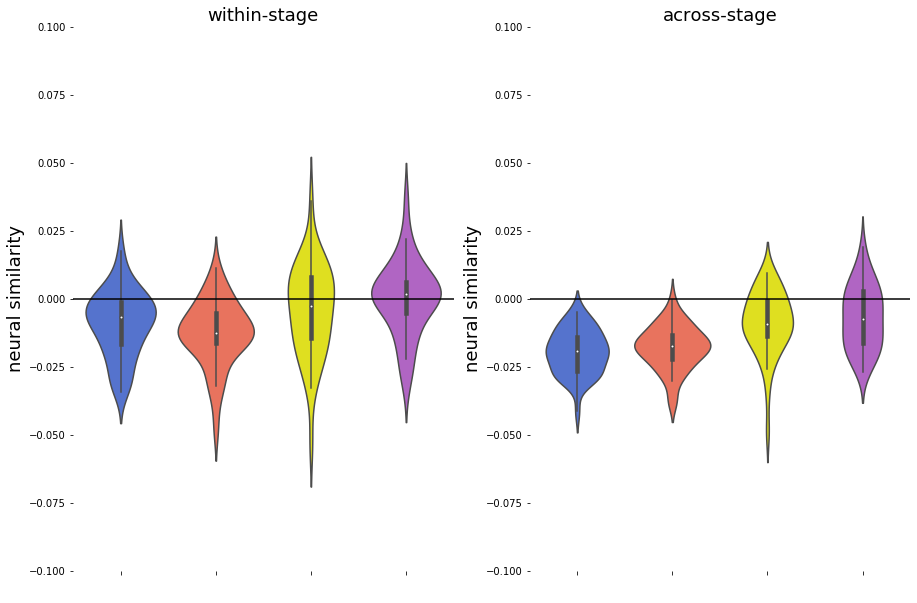

In [9]:
plt.figure(figsize=(15,10))

plt.subplot(1,2, 1)
plt.title("within-stage", fontsize=18)

set_of_Columns = [sameOtherMean_withinStage, 
                  otherOtherMean_withinStage,
                  otherSameMean_withinStage,
                  sameSameMean_withinStage]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim([-0.1,0.1]) 
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)




plt.subplot(1,2, 2)
plt.title("across-stage", fontsize=18)

set_of_Columns = [sameOtherMean_acrossStage, 
                  otherOtherMean_acrossStage,
                  otherSameMean_acrossStage,
                  sameSameMean_acrossStage]

set_of_Columns4 = pd.DataFrame(set_of_Columns)
set_of_Columns4 = set_of_Columns4.transpose()
seaborn.violinplot(data = set_of_Columns4, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim([-0.1,0.1]) 
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

# to save figure as .eps file
# plt.savefig(output_dir + ROI_name + '_violin_grandAverage.eps')


# save mean output for t-tests

In [ ]:
# save output to csv file for later t tests (performed in JASP)
set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + ROI_name + '_grandAverage_withinStage.csv')
    
set_of_Columns4 = set_of_Columns4.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns4.to_csv(output_dir + ROI_name + '_grandAverage_acrossStage.csv')
    